In [ ]:
!pip install scikit-learn

In [ ]:
!pip install powerlaw

In [2]:
from scipy.io import wavfile
import numpy as np
import os
from pathlib import Path
from sklearn.decomposition import PCA

In [7]:
import matplotlib.pyplot as plt

In [3]:
CURRENT_FILE = Path().resolve()
PROJECT_ROOT = CURRENT_FILE.parents[0]

npy_dir = PROJECT_ROOT / "data" / "processed" / "arrays_3s"

In [ ]:
npy_files = sorted(npy_dir.glob("*.npy"))
npy_files

In [5]:
energies = []
for f in npy_files:
    arr = np.load(f)
    energy = np.sum(np.abs(arr))
    energies.append(energy)

energies = np.array(energies)

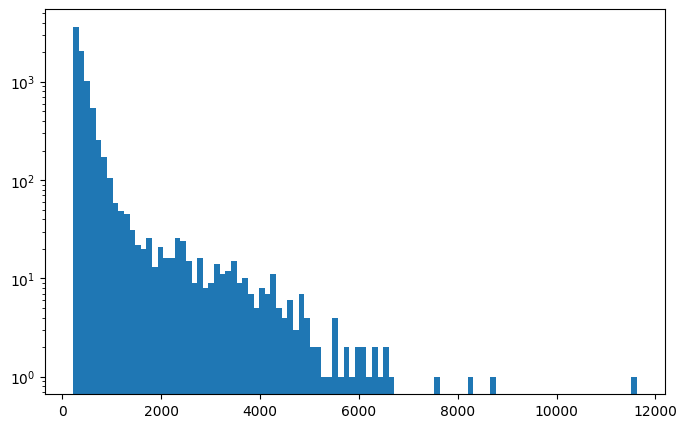

In [9]:
plt.figure(figsize=(8,5))
plt.hist(energies, bins = 100)
plt.show()

xmin progress: 99%

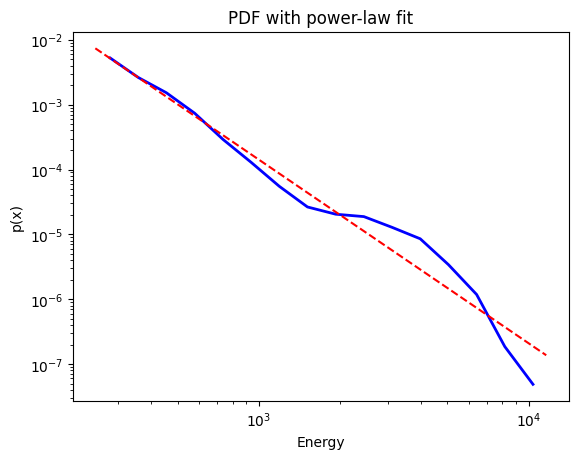

In [12]:
import powerlaw

fit = powerlaw.Fit(energies, verbose=False)

# Plot with log-log axes
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
plt.title("PDF with power-law fit")
plt.xlabel("Energy")
plt.ylabel("p(x)")
plt.show()

In [ ]:
array = []
for file in npy_files:
    arr = np.load(file)

    desired_length = 3 * 48000 # Length of chunk * sample rate
    if len(arr) > desired_length:
        arr = arr[:desired_length]
    elif len(arr) < desired_length:
        arr = np.pad(arr, (0, desired_length - len(arr))) # if too small, pad with 0s

    array.append(arr)

audio_data = np.stack(array)


In [23]:
print(f"Shape of feature matrix: {audio_data.shape}")

Shape of feature matrix: (8380, 144000)


In [26]:
# Data are enormous, so attempt some dimensionality reduction
pca = PCA(n_components = 0.9) # just to kick things off
pca.fit_transform(audio_data) 

array([[ 2.0332217e-02, -7.0696600e-02, -3.0809509e-02, ...,
        -1.1924381e-03,  1.5247158e-03, -3.5390225e-03],
       [-2.1817534e-01, -2.3220657e-01,  5.4983426e-02, ...,
         6.6325883e-04,  2.9543485e-03, -1.5441994e-03],
       [-6.5009676e-02, -1.8807037e-01,  2.1762702e-01, ...,
         7.9258153e-04,  1.1261210e-03,  1.4418612e-04],
       ...,
       [-8.7374998e-03,  1.9083643e-02,  5.8842045e-03, ...,
        -5.2202821e-02,  2.8075581e-02,  1.6504403e-02],
       [-1.1828619e-02,  1.3818971e-02, -5.2560394e-04, ...,
         1.5722768e-02, -1.4823557e-02, -2.2344314e-02],
       [-2.0300359e-02,  4.3285964e-03, -4.7404380e-03, ...,
        -5.5767442e-03,  7.3823491e-03, -2.6060099e-02]], dtype=float32)

In [28]:
pca.n_components_

997

In [33]:
audio_pca = pca.transform(audio_data) 

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_means = KMeans(n_clusters=5,random_state=1929)
labels = k_means.fit_predict(audio_pca)

score = silhouette_score(audio_pca, labels)
print(f"Silhouette score: {score:.3f}")

Python(32126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Silhouette score: 0.912


In [35]:
for cluster_id in range(5):
    print(f"Cluster {cluster_id} samples:")
    sample_files = [f for f, lbl in zip(npy_files, labels) if lbl == cluster_id][:10]
    for file in sample_files:
        print(file.name)


Cluster 0 samples:
20240611_050000_chunk_000.npy
20240611_050000_chunk_001.npy
20240611_050000_chunk_002.npy
20240611_050000_chunk_003.npy
20240611_050000_chunk_004.npy
20240611_050000_chunk_005.npy
20240611_050000_chunk_006.npy
20240611_050000_chunk_007.npy
20240611_050000_chunk_008.npy
20240611_050000_chunk_009.npy
Cluster 1 samples:
20240611_050000_chunk_1003.npy
Cluster 2 samples:
20240611_050000_chunk_016.npy
Cluster 3 samples:
20240611_063000_chunk_315.npy
Cluster 4 samples:
20240611_050000_chunk_1171.npy


In [36]:
from collections import Counter
import numpy as np

# Assuming 'labels' is from your kmeans clustering
counts = Counter(labels)
for cluster_id, count in sorted(counts.items()):
    print(f"Cluster {cluster_id}: {count} samples")


Cluster 0: 8376 samples
Cluster 1: 1 samples
Cluster 2: 1 samples
Cluster 3: 1 samples
Cluster 4: 1 samples


In [51]:
# NEXT STEP: Try KMeans again with 20 clusters
k_means20 = KMeans(n_clusters=20,random_state=1929)
labels20 = k_means20.fit_predict(audio_pca)

score20 = silhouette_score(audio_pca, labels20)
print(f"Silhouette score: {score:.3f}")

Silhouette score: 0.912


In [52]:
for cluster_id in range(50):
    print(f"Cluster {cluster_id} samples:")
    sample_files = [f for f, lbl in zip(npy_files, labels20) if lbl == cluster_id][:10]
    for file in sample_files:
        print(file.name)

Cluster 0 samples:
20240611_050000_chunk_003.npy
20240611_050000_chunk_006.npy
20240611_050000_chunk_018.npy
20240611_050000_chunk_022.npy
20240611_050000_chunk_024.npy
20240611_050000_chunk_025.npy
20240611_050000_chunk_027.npy
20240611_050000_chunk_029.npy
20240611_050000_chunk_046.npy
20240611_050000_chunk_056.npy
Cluster 1 samples:
20240611_050000_chunk_1003.npy
Cluster 2 samples:
20240611_063000_chunk_315.npy
Cluster 3 samples:
20240611_050000_chunk_1171.npy
Cluster 4 samples:
20240611_050000_chunk_028.npy
Cluster 5 samples:
20240611_063000_chunk_309.npy
Cluster 6 samples:
20240611_063000_chunk_272.npy
Cluster 7 samples:
20240611_050000_chunk_001.npy
Cluster 8 samples:
20240611_050000_chunk_1106.npy
Cluster 9 samples:
20240611_050000_chunk_122.npy
Cluster 10 samples:
20240611_063000_chunk_316.npy
Cluster 11 samples:
20240611_050000_chunk_116.npy
Cluster 12 samples:
20240611_050000_chunk_303.npy
Cluster 13 samples:
20240611_050000_chunk_019.npy
Cluster 14 samples:
20240611_050000_c

In [42]:
label_counts20 = Counter(labels20)
for cluster_id, count in sorted(label_counts20.items()):
    print(f"Cluster {cluster_id}: {count} samples")


Cluster 0: 8376 samples
Cluster 1: 1 samples
Cluster 2: 1 samples
Cluster 3: 1 samples
Cluster 4: 1 samples


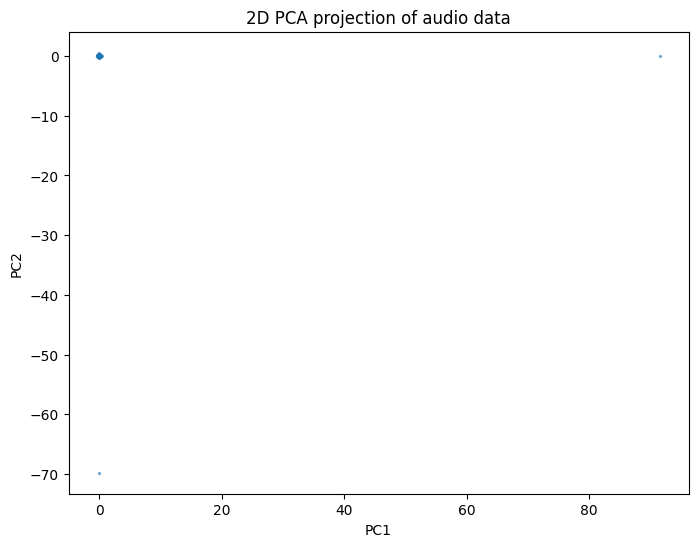

In [43]:
import matplotlib.pyplot as plt

pca_vis = PCA(n_components=2)
audio_vis = pca_vis.fit_transform(audio_data)

plt.figure(figsize=(8, 6))
plt.scatter(audio_vis[:, 0], audio_vis[:, 1], s=2, alpha=0.5)
plt.title("2D PCA projection of audio data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

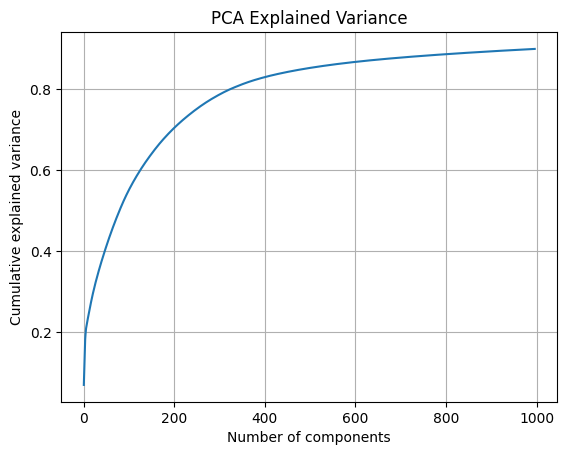

In [44]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid(True)
plt.title("PCA Explained Variance")
plt.show()

In [45]:
pca_80 = PCA(n_components=350, random_state=1929)
audio_pca_80 = pca_80.fit_transform(audio_data)

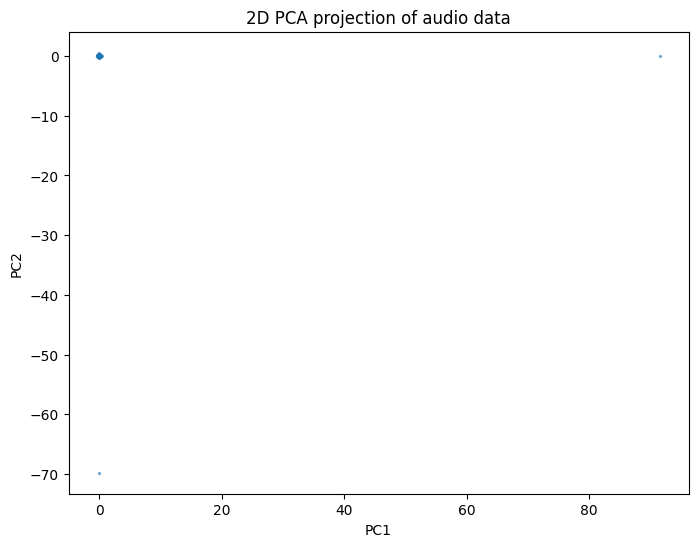

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(audio_pca_80[:, 0], audio_pca_80[:, 1], s=2, alpha=0.5)
plt.title("2D PCA projection of audio data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [49]:
# NEXT STEP: Try KMeans again with 20 clusters
k_means10 = KMeans(n_clusters=10,random_state=1929)
labels10 = k_means10.fit_predict(audio_pca_80)

score10 = silhouette_score(audio_pca_80, labels10)
print(f"Silhouette score: {score10:.3f}")

Silhouette score: 0.942


In [50]:
for cluster_id in range(10):
    print(f"Cluster {cluster_id} samples:")
    sample_files = [f for f, lbl in zip(npy_files, labels10) if lbl == cluster_id][:10]
    for file in sample_files:
        print(file.name)

Cluster 0 samples:
20240611_050000_chunk_000.npy
20240611_050000_chunk_001.npy
20240611_050000_chunk_002.npy
20240611_050000_chunk_003.npy
20240611_050000_chunk_004.npy
20240611_050000_chunk_005.npy
20240611_050000_chunk_006.npy
20240611_050000_chunk_007.npy
20240611_050000_chunk_008.npy
20240611_050000_chunk_009.npy
Cluster 1 samples:
20240611_050000_chunk_1003.npy
Cluster 2 samples:
20240611_063000_chunk_315.npy
Cluster 3 samples:
20240611_050000_chunk_1171.npy
Cluster 4 samples:
20240611_063000_chunk_267.npy
Cluster 5 samples:
20240611_050000_chunk_125.npy
Cluster 6 samples:
20240611_063000_chunk_307.npy
Cluster 7 samples:
20240611_063000_chunk_316.npy
Cluster 8 samples:
20240611_063000_chunk_270.npy
Cluster 9 samples:
20240611_050000_chunk_1106.npy


In [54]:
label_counts10 = Counter(labels10)
for cluster_id, count in sorted(label_counts10.items()):
    print(f"Cluster {cluster_id}: {count} samples")

Cluster 0: 8371 samples
Cluster 1: 1 samples
Cluster 2: 1 samples
Cluster 3: 1 samples
Cluster 4: 1 samples
Cluster 5: 1 samples
Cluster 6: 1 samples
Cluster 7: 1 samples
Cluster 8: 1 samples
Cluster 9: 1 samples
